# Dimensionality Reduction

## Display 3dim data

Here is an example on displaying 3dim data.

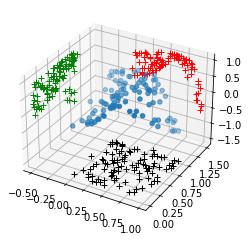

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x= np.random.random(100)
y= np.random.random(100)
z= np.sin(3*x**2+y**2)

fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(x,y,z)

ax.plot(x, z, 'r+', zdir='y', zs=1.5)
ax.plot(y, z, 'g+', zdir='x', zs=-0.5)
ax.plot(x, y, 'k+', zdir='z', zs=-1.5)

plt.show()

## Covariance

Using numpy and from scratch as comparison.

In [36]:
import pandas as pd
import numpy as np

X = np.array([[0, 3, 4], [1, 2, 4], [3, 4, 5]]) 

np.cov(X,rowvar=False)

array([[2.33333333, 1.        , 0.83333333],
       [1.        , 1.        , 0.5       ],
       [0.83333333, 0.5       , 0.33333333]])

In [37]:
def covarianceA(X):
    # Extract the number of rows and columns
    N, M = X.shape
    # Calculate the covariance matrix
    cov = np.zeros((M, M))
    for i in range(M):
        # Mean of column "i"
        mean_i = np.sum(X[:, i]) / N
        for j in range(M):
            # Mean of column "j"
            mean_j = np.sum(X[:, j]) / N
            # Covariance between column "i" and column "j"
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
    return cov

print(covarianceA(X))

[[2.33333333 1.         0.83333333]
 [1.         1.         0.5       ]
 [0.83333333 0.5        0.33333333]]


## PCA from scratch

In [10]:
class PCA:
    def fit_transform(self, X, n_components=2):
        # get number of samples and components
        self.n_samples = X.shape[0]
        self.n_components = n_components
        # standardize data
        self.A = self.standardize_data(X)
        # calculate covariance matrix
        covariance_matrix = self.get_covariance_matrix()
        # retrieve selected eigenvectors
        eigenvectors = self.get_eigenvectors(covariance_matrix)
        # project into lower dimension
        projected_matrix = self.project_matrix(eigenvectors)
        return projected_matrix

    def standardize_data(self, X):
        # subtract mean and divide by standard deviation columnwise
        numerator = X - np.mean(X, axis=0)
        denominator = np.std(X, axis=0)
        return numerator / denominator
    
    def get_covariance_matrix(self, ddof=0):
        # calculate covariance matrix with standardized matrix A
        C = np.dot(self.A.T, self.A) / (self.n_samples-ddof)
        return C

    def get_eigenvectors(self, C):
        # calculate eigenvalues & eigenvectors of covariance matrix 'C'
        eigenvalues, eigenvectors = np.linalg.eig(C)
        # sort eigenvalues descending and select columns based on n_components
        n_cols = np.argsort(eigenvalues)[::-1][:self.n_components]
        selected_vectors = eigenvectors[:, n_cols]
        return selected_vectors

    def project_matrix(self, eigenvectors):
        P = np.dot(self.A, eigenvectors)
        return P

/home/marcel/.local/lib/python3.6/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


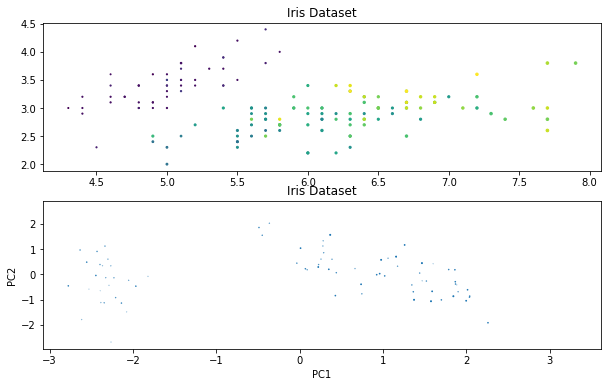

In [51]:
from sklearn import datasets
import matplotlib.pyplot as plt

# load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# instantiate and fit_transform PCA
pca = PCA()
X_pca = pca.fit_transform(X, n_components=3)

# plot results
fig, ax = plt.subplots(2, 1, figsize=(10,6))


ax[0].scatter(X[:,0], X[:,1], X[:,2],X[:,3])

ax[0].set_title('Iris Dataset')


ax[1].scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2])

ax[1].set_title('Iris Dataset')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

plt.show()